In [48]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import glob
import os
import matplotlib.pyplot as plt
import h5py as h5
%matplotlib inline

import seaborn as sns
import pandas as pd
from neuraltda import TPLCP
reload(TPLCP)

<module 'neuraltda.TPLCP' from '/home/brad/code/NeuralTDA/neuraltda/TPLCP.py'>

In [2]:
block_path = '/home/brad/krista/B1075/P01S03/'
block_path = '/home/brad/krista/B1083/P03S03/'
bdf = glob.glob('/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned')[0]

birds = ['B1083', 'B1075', 'B1235', 'B1056']
#birds = ['B1075']

bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Stim classes
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1075_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}
B1087_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1235_classes = {'E_scaled_burung': 'R', 'F_scaled_burung':'L', 'G_scaled_burung':'R', 'H_scaled_burung':'L'}
B1056_classes = {'A_scaled_burung': 'R', 'B_scaled_burung':'L', 'C_scaled_burung':'R', 'D_scaled_burung':'L'}

stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1083_stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1075_stims = ['E_40k', 'F_40k', 'G_40k', 'H_40k']
B1235_stims = ['E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung']
B1056_stims = ['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung']

stim_classes = {'B1083': B1083_classes, 'B1075': B1075_classes,
                'B1235': B1235_classes, 'B1056': B1056_classes}
bird_stims = {'B1083': B1083_stims, 'B1075': B1075_stims,
              'B1235': B1235_stims, 'B1056': B1056_stims}

In [3]:
winsize = 10.0
dtovr = winsize*0.5
comment = 'ForLogisticPred'
segment_info = [0,0]

bdfs = []
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, winsize, segment_info, cluster_group=['Good'], dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs.append([bird, bdf])

/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForLogisticPred/20170724T191746Z-10.0-5.0.binned
/home/brad/krista/B1075/P01S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForLogisticPred/20170724T194237Z-10.0-5.0.binned
/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForLogisticPred/20170724T194243Z-10.0-5.0.binned
/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForLogisticPred/20170825T212326Z-10.0-5.0.binned


In [4]:
# Behavioral class decoder accuracy vs shuffled. 

reload(tp2)
analysis_id = 'test2'
thresh = 4.0
nperms = 20

ncellsperm = 30
dims = [0,1,2,3,4]
Ntimes = 10
twin = np.linspace(0, 6000, Ntimes)
p_test = 0.2
N_tests = 60

name = 'ShuffleClassLabels'
acframe_behavioralclass = pd.DataFrame(columns=['Bird', 'Accuracy', 'Shuffle'])
for b in bdfs:
    bird = b[0]
    bdf = b[1]
    stimc = stim_classes[bird]
    stims = bird_stims[bird]
    (bcAll, t, t_ms) =tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, dims, twin, winsize, dtovr)

    #bc2s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 2, twin, winsize, dtovr, shuffle=True)
    #bc1s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 1, twin, winsize, dtovr, shuffle=True)
    #bc0s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 0, twin, winsize, dtovr, shuffle=True)
    #bc3s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 3, twin, winsize, dtovr, shuffle=True)
    
    

    accuracies = TPLCP.predict_stimuli_classes(bcAll, Ntimes, stims, stimc, p_test, N_tests)
    accuracies_shuff = TPLCP.predict_stimuli_classes(bcAll, Ntimes, stims, stimc, p_test, N_tests, shuff_Y=True)
    acframeapp = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies, 'Shuffle': N_tests*['No'] })
    acframeapps = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies_shuff, 'Shuffle': N_tests*['Yes'] })
    acframe_behavioralclass = acframe_behavioralclass.append(acframeapp)
    acframe_behavioralclass = acframe_behavioralclass.append(acframeapps)

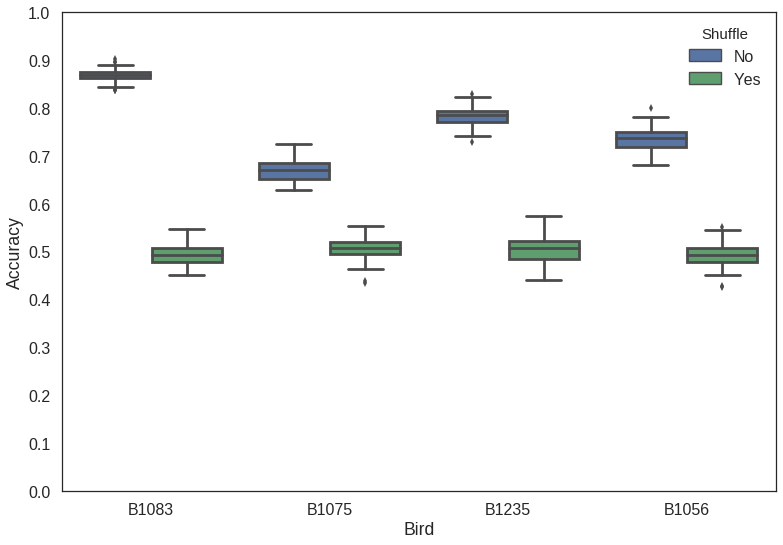

In [5]:
sns.set_context('poster')
sns.set_style('white')
plt.figure()
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_behavioralclass)
plt.plot()
plt.ylim([0, 1])
plt.yticks([x/10 for x in range(11)])
plt.savefig('/home/brad/DailyLog/20170828/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

In [6]:
# Decode stimulus name

# Stim classes
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1075_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}
B1087_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1235_classes = {'E_scaled_burung': 'R', 'F_scaled_burung':'L', 'G_scaled_burung':'R', 'H_scaled_burung':'L'}

stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1083_stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1075_stims = ['E_40k', 'F_40k', 'G_40k', 'H_40k']
B1235_stims = ['E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung']

stim_classes = {'B1083': B1083_classes, 'B1075': B1075_classes, 'B1235': B1235_classes}
bird_stims = {'B1083': B1083_stims, 'B1075': B1075_stims, 'B1235': B1235_stims}



# Stim classes
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1075_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}
B1087_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1235_classes = {'E_scaled_burung': 'R', 'F_scaled_burung':'L', 'G_scaled_burung':'R', 'H_scaled_burung':'L'}
B1056_classes = {'A_scaled_burung': 'R', 'B_scaled_burung':'L', 'C_scaled_burung':'R', 'D_scaled_burung':'L'}

stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1083_stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1075_stims = ['E_40k', 'F_40k', 'G_40k', 'H_40k']
B1235_stims = ['E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung']
B1056_stims = ['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung']

stim_classes = {'B1083': B1083_classes, 'B1075': B1075_classes,
                'B1235': B1235_classes, 'B1056': B1056_classes}
bird_stims = {'B1083': B1083_stims, 'B1075': B1075_stims,
              'B1235': B1235_stims, 'B1056': B1056_stims}
reload(tp2)
analysis_id = 'test'
thresh = 4.0
nperms = 20
ncellsperm = 30

dims = [0,1,2,3, 4]
Ntimes = 10
twin = np.linspace(0, 6000, Ntimes)
p_test = 0.2
N_tests = 60

name = 'PredictStimulusID'
acframe_stimulusID = pd.DataFrame(columns=['Bird', 'Accuracy', 'Shuffle'])
for b in bdfs:
    bird = b[0]
    bdf = b[1]
    print(bird)
    #stimc = stim_classes[bird]
    #stims = bird_stims[bird]
    (bcAll, t, t_ms) =tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, dims, twin, winsize, dtovr)
    print('Completed Betti Computation...')

    #bc2s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 2, twin, winsize, dtovr, shuffle=True)
    #bc1s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 1, twin, winsize, dtovr, shuffle=True)
    #bc0s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 0, twin, winsize, dtovr, shuffle=True)
    #bc3s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 3, twin, winsize, dtovr, shuffle=True)
    
    
    stims = bcAll.keys()
    stimc = {x: x for x in stims}
    accuracies = TPLCP.predict_stimuli_classes(bcAll, Ntimes, stims, stimc, p_test, N_tests)
    accuracies_shuff = TPLCP.predict_stimuli_classes(bcAll, Ntimes, stims, stimc, p_test, N_tests, shuff_Y=True)
    acframeapp = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies, 'Shuffle': N_tests*['No'] })
    acframeapps = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies_shuff, 'Shuffle': N_tests*['Yes'] })
    acframe_stimulusID = acframe_stimulusID.append(acframeapp)
    acframe_stimulusID = acframe_stimulusID.append(acframeapps)

B1083
Completed Betti Computation...
B1075
Completed Betti Computation...
B1235
Completed Betti Computation...
B1056
Completed Betti Computation...


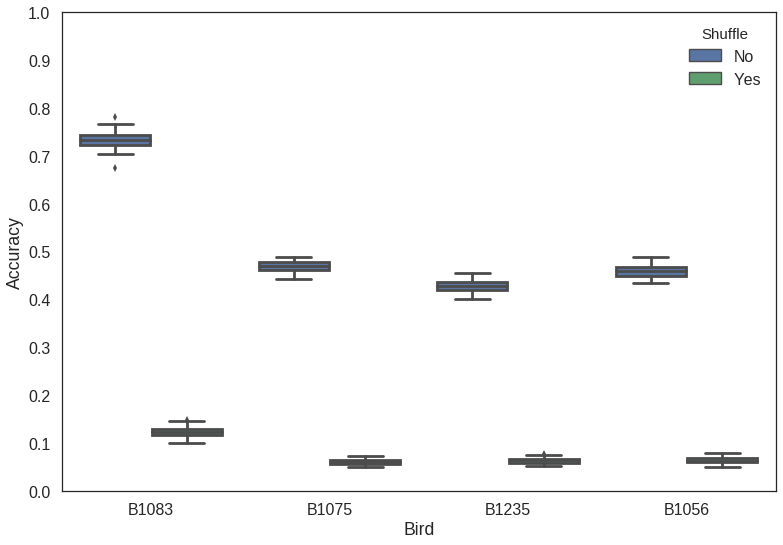

In [7]:
sns.set_context('poster')
sns.set_style('white')
plt.figure()

sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_stimulusID)
plt.ylim([0, 1])
plt.yticks([x/10 for x in range(11)])
plt.savefig('/home/brad/DailyLog/20170828/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

In [8]:
# Decode arbitrary unfamiliar stimuli

# Stim classes
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1075_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}
B1087_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1235_classes = {'E_scaled_burung': 'R', 'F_scaled_burung':'L', 'G_scaled_burung':'R', 'H_scaled_burung':'L'}


B1083_unf_stims = ['I_40k', 'J_40k', 'K_40k', 'L_40k']

B1075_unf_stims = ['A_40k', 'B_40k', 'C_40k', 'D_40k',
                   'I_40k', 'J_40k', 'K_40k', 'L_40k',
                   'M_40k', 'N_40k', 'O_40k', 'P_40k']

B1235_unf_stims = ['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung',
                   'I_scaled_burung', 'J_scaled_burung', 'K_scaled_burung', 'L_scaled_burung',
                   'M_scaled_burung', 'N_scaled_burung', 'O_scaled_burung', 'P_scaled_burung',]

B1056_unf_stims = ['E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung',
                   'I_scaled_burung', 'J_scaled_burung', 'K_scaled_burung', 'L_scaled_burung',
                   'M_scaled_burung', 'N_scaled_burung', 'O_scaled_burung', 'P_scaled_burung',]

stimclab = ['R', 'L']
bird_unf_stims = {'B1083': B1083_unf_stims, 'B1075': B1075_unf_stims,
                  'B1235': B1235_unf_stims, 'B1056': B1056_unf_stims}

reload(tp2)
analysis_id = 'test2'
thresh = 4.0
nperms = 20
ncellsperm = 30
dims = [0,1,2,3, 4]
Ntimes = 10
twin = np.linspace(0, 6000, Ntimes)
p_test = 0.2
N_tests = 60

name = 'PredictArbitraryUnfamiliar'
acframe_arbunf = pd.DataFrame(columns=['Bird', 'Accuracy', 'Shuffle'])
for b in bdfs:
    bird = b[0]
    bdf = b[1]
    print(bird)
    #stimc = stim_classes[bird]
    stims = bird_unf_stims[bird]
    (bcAll, t, t_ms) =tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, dims, twin, winsize, dtovr)
    print('Completed Betti Computation...')

    #bc2s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 2, twin, winsize, dtovr, shuffle=True)
    #bc1s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 1, twin, winsize, dtovr, shuffle=True)
    #bc0s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 0, twin, winsize, dtovr, shuffle=True)
    #bc3s, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf, thresh, nperms, ncellsperm, 3, twin, winsize, dtovr, shuffle=True)
    
    
    stims = bcAll.keys()
    
    accuracies = TPLCP.predict_arbitrary_classes(bcAll, stims, stimclab, p_test, N_tests)
    accuracies_shuff = TPLCP.predict_arbitrary_classes(bcAll, stims, stimclab, p_test, N_tests, shuff_Y=True)
    acframeapp = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies, 'Shuffle': N_tests*['No'] })
    acframeapps = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies_shuff, 'Shuffle': N_tests*['Yes'] })
    acframe_arbunf = acframe_arbunf.append(acframeapp)
    acframe_arbunf = acframe_arbunf.append(acframeapps)

B1083
Completed Betti Computation...
B1075
Completed Betti Computation...
B1235
Completed Betti Computation...
B1056
Completed Betti Computation...


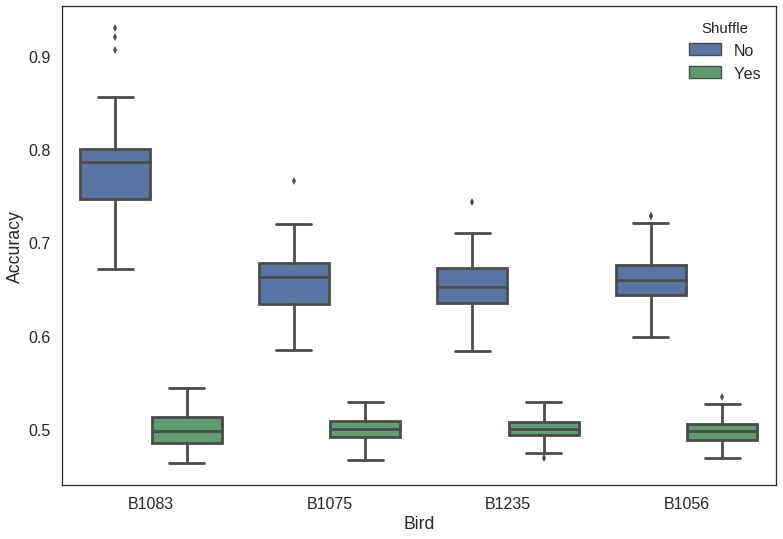

In [9]:
 
plt.figure()
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_arbunf)
plt.savefig('/home/brad/DailyLog/20170828/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

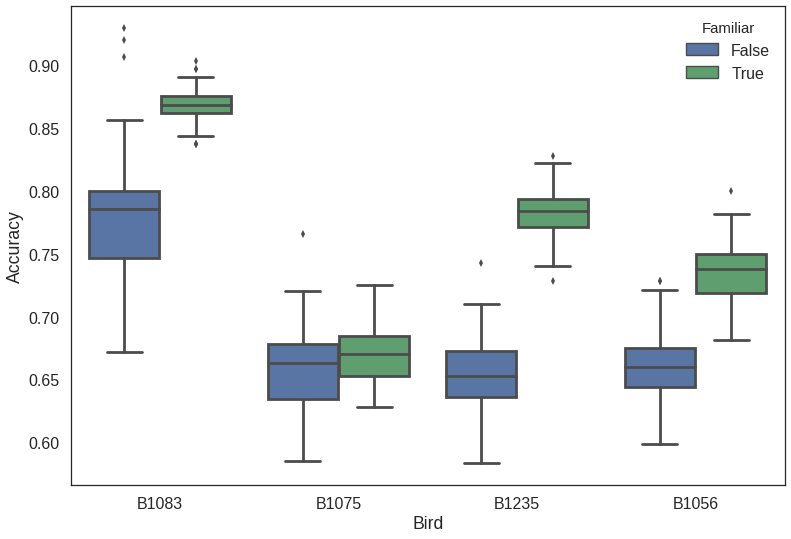

In [10]:
# plot familiar vs. unfamiliar
acframe_arbunf['Familiar'] = len(acframe_arbunf)*[False]
acframe_behavioralclass['Familiar'] = len(acframe_behavioralclass)*[True]

acframe_fam_unf = acframe_arbunf.append(acframe_behavioralclass)

name = 'FamilarvsUnfamiliar'
sns.boxplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf[acframe_fam_unf['Shuffle']=='No'])
plt.savefig('/home/brad/DailyLog/20170828/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

In [42]:
from scipy.stats import ttest_ind
ufu = acframe_fam_unf[acframe_fam_unf['Shuffle']=='No']
print(ufu.head())
b = 'B1083'
fam = ufu[(ufu['Bird'] == b) & (ufu['Familiar']==True)]
unf = ufu[(ufu['Bird'] == b) & (ufu['Familiar']==False)]

ttest_ind(fam['Accuracy'], unf['Accuracy'], equal_var=False)

   Accuracy   Bird Shuffle Familiar
0  0.806250  B1083      No    False
1  0.698438  B1083      No    False
2  0.770312  B1083      No    False
3  0.787500  B1083      No    False
4  0.845313  B1083      No    False


Ttest_indResult(statistic=12.637426001185133, pvalue=1.5804055105291806e-19)

In [32]:
test1 = ufu['Bird'] == b
test2 = ufu['Familiar'] == True

In [35]:
test2 & test1

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [53]:
from neuraltda import FRLCP

In [78]:
k=2
bdf = bdfs[k][1]
print(bdf)
bird = bdfs[k][0]
poptensors = {}
with h5.File(bdf, 'r') as f:
    for stim in list(f.keys()):
        poptensors[stim] = np.array(f[stim]['pop_tens'])

/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForLogisticPred/20170724T194243Z-10.0-5.0.binned


In [82]:
reload(FRLCP)
name = 'FiringRate'
acframe_FR = pd.DataFrame(columns=['Bird', 'Accuracy', 'Shuffle'])
for b in bdfs:
    bird = b[0]
    bdf = b[1]
    print(bird)
    poptensors = {}
    with h5.File(bdf, 'r') as f:
        for stim in list(f.keys()):
            poptensors[stim] = np.array(f[stim]['pop_tens'])
    stims = bird_stims[bird]
    stimc = stim_classes[bird]
    accuracies = FRLCP.predict_stimuli_classes_population_FR(poptensors, Ntimes, stims, stimc, p_test, N_tests)
    accuracies_shuff = FRLCP.predict_stimuli_classes_population_FR(poptensors, Ntimes, stims, stimc, p_test, N_tests, shuff_Y=True)
    acframeapp = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies, 'Shuffle': N_tests*['No'] })
    acframeapps = pd.DataFrame({'Bird': N_tests*[bird], 'Accuracy': accuracies_shuff, 'Shuffle': N_tests*['Yes'] })
    acframe_FR = acframe_FR.append(acframeapp)
    acframe_FR = acframe_FR.append(acframeapps)




B1083
B1075
B1235
B1056


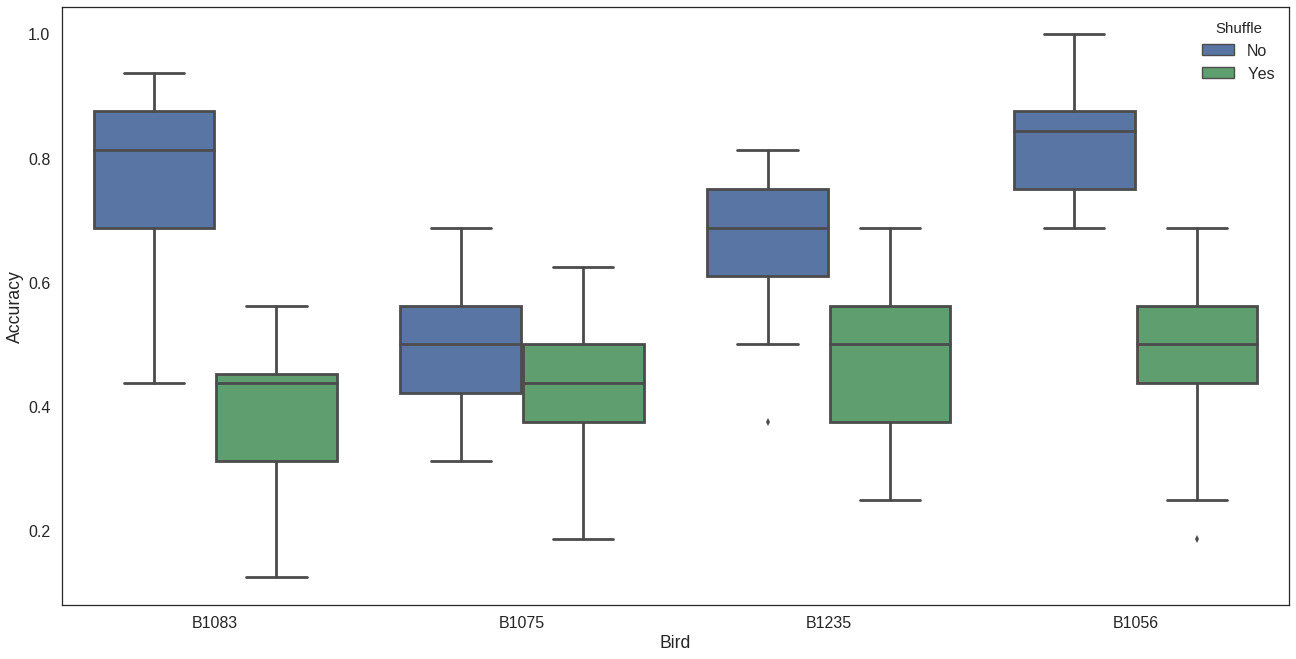

In [84]:
 
plt.figure(figsize=(22,11))
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_FR)
plt.savefig('/home/brad/DailyLog/20170828/FRpredict_{}_{}_{}_{}.eps'.format(Ntimes, p_test, N_tests, name))

In [71]:
bird_stims

{'B1056': ['A_scaled_burung',
  'B_scaled_burung',
  'C_scaled_burung',
  'D_scaled_burung'],
 'B1075': ['E_40k', 'F_40k', 'G_40k', 'H_40k'],
 'B1083': ['M_40k', 'N_40k', 'O_40k', 'P_40k'],
 'B1235': ['E_scaled_burung',
  'F_scaled_burung',
  'G_scaled_burung',
  'H_scaled_burung']}